In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

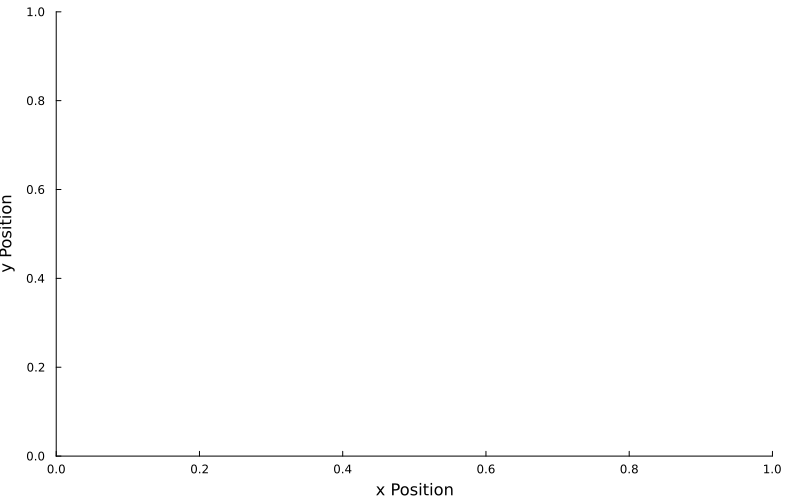

In [4]:
# Define the plot
num_points = 50

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

In [5]:
ops = gaussian_operators_2D(0.1, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 99.99999999999999), 2601), var"#Φ#30"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 99.99999999999999), 2601)), var"#adjΦ#31"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 99.99999999999999), 2601)

## Pre-certificate

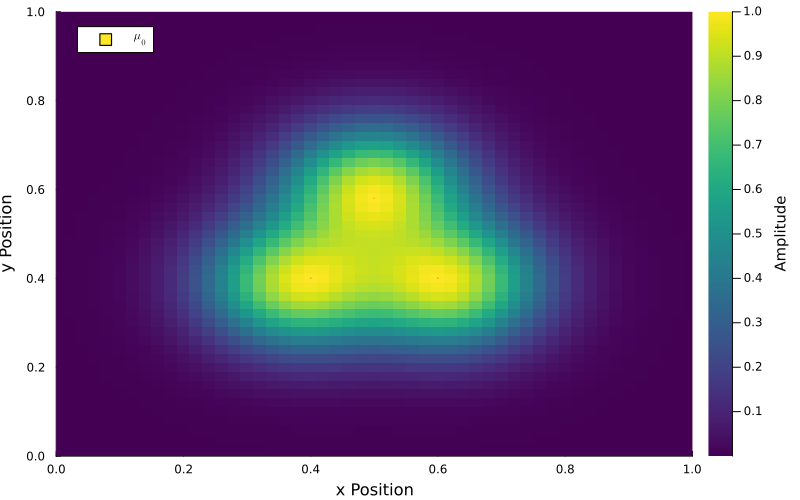

In [6]:
x0 = [[0.4, 0.5, 0.6], [0.4, 0.58, 0.4]]
a0 = [1.0, 1.0, 1.0]

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", marker=:square)

### SFW

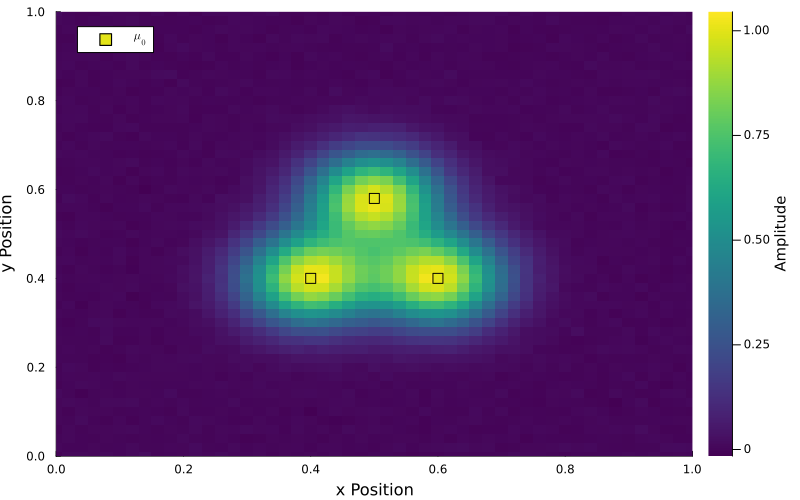

In [7]:
y0 = ops.Φ(μ0...)

function add_noise(y0, noise_level)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

# Add noise to the observation y = y0 + w
noise_level = 0.02
y = add_noise(y0, noise_level)

plt_obs = deepcopy(plt)

heatmap!(plt_obs, grid, grid, reshape(y, size(plt_grid_x1)), color=:viridis)
plot_spikes!(plt_obs, μ0, label=L"μ_0", marker=:square, markersize=5, markerstrokewidth=1)

In [ ]:
prob = BLASSO(y, ops, domain)

plt_cert_behav = deepcopy(plt_obs)

solve!(prob, :SFW, options=Dict(:descent => :LBFGS, :positivity => true), δ = noise_level, τ = 10, q = 0.5)
plot_spikes!(plt_cert_behav, prob.μ, label=L"\hat{μ}", marker=:circle)

λ: 1000.0
| Iteration | Lasso time | Lasso gc  | Lasso compile | LD time  | LD gc   | LD compile  |
|-----------|------------|-----------|---------------|----------|---------|-------------|
  0.019762 seconds (5.40 k allocations: 44.058 MiB, 30.04% gc time)
r: 12.134746696065571
τδ: 0.2
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 500.0
| Iteration | Lasso time | Lasso gc  | Lasso compile | LD time  | LD gc   | LD compile  |
|-----------|------------|-----------|---------------|----------|---------|-------------|
  0.019568 seconds (5.40 k allocations: 44.058 MiB, 13.81% gc time)
r: 12.134746696065571
τδ: 0.2
prob.μ: DiscreteMeasure([Float64[], Float64[]], Float64[], 2, 0)

λ: 250.0
| Iteration | Lasso time | Lasso gc  | Lasso compile | LD time  | LD gc   | LD compile  |
|-----------|------------|-----------|---------------|----------|---------|-------------|
  0.019681 seconds (5.39 k allocations: 44.058 MiB, 30.36% gc time)
r: 12.134746696065571
τδ: 0.2
prob.μ